In [1]:
# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# Visualization libraries
# import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image 
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
# from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from joblib import dump, load

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from torch.nn.parallel import DataParallel
from copy import deepcopy
import time
from tqdm import tqdm 
# Seed for reproducability
seed = 1024
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

2024-09-01 21:32:28.247066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 21:32:28.299478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 21:32:28.299798: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 21:32:28.379349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-01 21:32:29.099476: W tensorflow/compiler/tf

In [40]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """
        Calculates the accuracy score between labels and predictions.
        
        :param y_true: The true labels of the data
        :param y_pred: The predictions for the data
        
        :return: a floating point number denoting the accuracy
    """
    return np.round(accuracy_score(y_true, y_pred) * 100, 2)

X_train.shape before resize and reshape:  (60000, 28, 28)


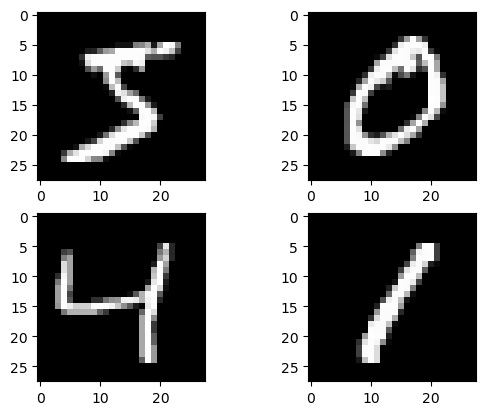

In [41]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#
print('X_train.shape before resize and reshape: ' , X_train.shape)

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

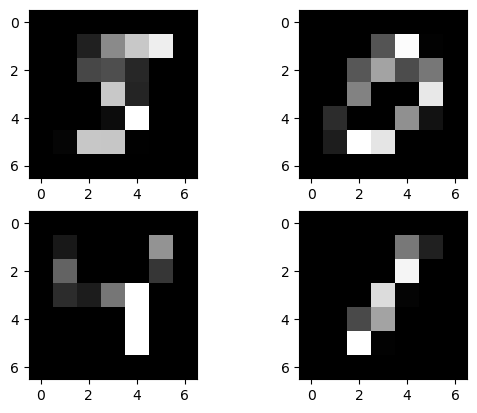

In [42]:
data_train = np.concatenate((X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]).astype('float32'), y_train.reshape(len(y_train),1).astype('float32')),1)
# soft_label = produce_soft_labels(data_train, round_num=1, fold_num=2, k=1, model='rf')
# [X_train_resize.append(cv2.resize(X_train[i], [7,7])) for i in range(X_train.shape[0])]
X_train_resize = np.array([cv2.resize(X_train[i], [7,7],cv2.INTER_AREA) for i in range(X_train.shape[0])])
X_test_resize = np.array([cv2.resize(X_test[i], [7,7],cv2.INTER_AREA) for i in range(X_test.shape[0])])
plt.subplot(221)
plt.imshow(X_train_resize[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_resize[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_resize[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_resize[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [43]:
X_train_resize, X_test_resize = X_train,X_test

num_pixels = X_train_resize.shape[1] * X_train_resize.shape[2]

X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], num_pixels).astype('float32')
X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], num_pixels).astype('float32')


print('X_train.shape after resize and reshape: ' , X_train_resize.shape)

# normalize inputs from 0-255 to 0-1
X_train_resize = X_train_resize / 255
X_test_resize = X_test_resize / 255

# one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# Y_train = np_utils.to_categorical(y_train)
# Y_test = np_utils.to_categorical(y_test)

# num_classes = Y_test.shape[1]

X_train.shape after resize and reshape:  (60000, 784)


In [ ]:
import openml
#openml.config.apikey = 'FILL_IN_OPENML_API_KEY'  # set the OpenML Api Key
# SUITE_ID = 336 # Regression on numerical features
SUITE_ID = 337 # Classification on numerical features
#SUITE_ID = 335 # Regression on numerical and categorical features
#SUITE_ID = 334 # Classification on numerical and categorical features
benchmark_suite = openml.study.get_suite(SUITE_ID)  # obtain the benchmark suite

# for task_id in benchmark_suite.tasks:  # iterate over all tasks
#     task = openml.tasks.get_task(task_id)  # download the OpenML task
#     print(task_id)
    # dataset = task.get_dataset()
    # X, y, categorical_indicator, attribute_names = dataset.get_data(
    #     dataset_format="dataframe", target=dataset.default_target_attribute
    # )

In [ ]:
task_id_selected = [361055,361060,361066,361273,361275,361068] # credit,electricity,bankmarketing,Diabetes130US, default-of-credit-card-clients MiniBooNE
task_id_name = ['credit','electricity','bankmarketing','Diabetes130US', 'default-of-credit-card-clients','MiniBooNE']

In [ ]:
# dataset = pd.read_csv('../Dataset/connect4/c4_game_database.csv')
# dataset = pd.read_csv('../Dataset/connect4/connect-4.data')
# dataset = pd.read_csv('../Dataset/heart.csv')
# dataset = pd.read_csv('../Dataset/Acoustic_Extinguisher_Fire_Dataset.csv')
# dataset = datasets.load_iris()
task_id_index = 5
task_id = task_id_selected[task_id_index]
task_name = task_id_name[task_id_index]
task = openml.tasks.get_task(task_id)
dataset = task.get_dataset()
X, y, categorical_indicator, attribute_names = dataset.get_data(
        dataset_format="dataframe", target=dataset.default_target_attribute
    )

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2,random_state=seed)
# random——seed: 42,37

le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=18)


# if task_id in [361055,361066,361273,361275] :
qt = QuantileTransformer(output_distribution="uniform", random_state=18)
X_train = qt.fit_transform(X_train)
X_val_test = qt.transform(X_val_test)

X_test,X_val,y_test, y_val  = train_test_split(X_val_test, y_val_test, test_size=0.33, random_state=18)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2,random_state=seed)
# random——seed: 42,37
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [5]:
best_depth = 6

In [7]:
# Train baseline decision tree model


# Train baseline decision tree model
clf_rf = RandomForestClassifier(250, min_samples_leaf=3, criterion="gini",random_state=seed+42,max_depth=best_depth)
clf_rf.fit(X_train, y_train)


clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
clf.fit(X_train, y_train)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [ ]:

rf_preds_baseline = clf_rf.predict(X_test)
train_preds_baseline = clf.predict(X_train)
val_preds_baseline = clf.predict(X_test)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_test)
acc_baseline_rf = acc(rf_preds_baseline, y_test)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')
print(f'Validation accuracy for our teacher rf model (using all pixel features): {acc_baseline_rf}%')

In [44]:
# Train baseline decision tree model

best_depth = 16
clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
clf.fit(X_train_resize, y_train)

clf_rf = RandomForestClassifier(50, min_samples_leaf=3, criterion="gini",random_state=seed,max_depth=best_depth)
clf_rf.fit(X_train_resize, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=3, n_estimators=50,
                       random_state=1024)

In [37]:
# Train baseline decision tree model

best_depth = 6
clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
clf.fit(X_train_resize, y_train)

clf_rf = RandomForestClassifier(250, min_samples_leaf=3, criterion="gini",random_state=seed,max_depth=best_depth)
clf_rf.fit(X_train_resize, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=250,
                       random_state=1024)

In [45]:
# clf = clf_new
rf_preds_baseline = clf_rf.predict(X_test_resize)
train_preds_baseline = clf.predict(X_train_resize)
val_preds_baseline = clf.predict(X_test_resize)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_test)
acc_baseline_rf = acc(rf_preds_baseline, y_test)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')
print(f'Validation accuracy for our teacher rf model (using all pixel features): {acc_baseline_rf}%')

Training accuracy for our baseline (using all pixel features): 98.83%
Validation accuracy for our baseline (using all pixel features): 88.11%
Validation accuracy for our teacher rf model (using all pixel features): 96.3%


In [ ]:
dump(clf_rf, './model_tabular/'+task_name+'_'+str(best_depth)+'_'+str(acc_baseline_rf)+'_rf.joblib')

In [ ]:
dump(clf_rf, './srf_model/'+str(best_depth)+'_rf_.joblib') 

In [ ]:
dump(clf, './srf_model/'+str(best_depth)+'_dt_.joblib') 

In [ ]:
test_rep = export_text(clf)
print(test_rep)

In [ ]:
#fig = plt.figure(dpi=200)
#_ = plot_tree(clf,feature_names=dataset.feature_names,class_names=['setosa', 'versicolor', 'virginica'],rounded=True,filled=True)

# plt.savefig('tree_plot.png',transparent=True)

In [46]:
def tree_path(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    # threshold = clf.tree_.threshold
    max_depth = clf.tree_.max_depth

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)



    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    node_path = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)
    left_right = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)

    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    depth = 0
    for i in range(n_nodes):
        previous_depth = depth
        depth = node_depth[i]
        
        if i!=0:
            node_path[i, :depth] = node_path[i-1, :depth]
            left_right[i, :depth] = left_right[i-1, :depth]
        node_path[i, depth] = i
        if depth>previous_depth:
            left_right[i, depth] = 0
        else:
            left_right[i, depth] = 1

        
    node_path_left_right = np.concatenate((node_path[:,:-1,np.newaxis],left_right[:,1:,np.newaxis]),axis = 2) 
    node_path_left_right = node_path_left_right[feature==-2]
    node_path = node_path_left_right[:,:,0]
    return node_depth, node_path_left_right

In [66]:
def get_tree_path(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    max_depth = clf.tree_.max_depth

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)



    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    node_path = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)
    left_right = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)

    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    depth = 0
    for i in range(n_nodes):
        previous_depth = depth
        depth = node_depth[i]
        
        if i!=0:
            node_path[i, :depth] = node_path[i-1, :depth]
            left_right[i, :depth] = left_right[i-1, :depth]
        node_path[i, depth] = i
        if depth>previous_depth:
            left_right[i, depth] = 0
        else:
            left_right[i, depth] = 1

        
    node_path_left_right = np.concatenate((node_path[:,:-1,np.newaxis],left_right[:,1:,np.newaxis]),axis = 2) 
    node_path_left_right = node_path_left_right[clf.tree_.feature==-2]
    node_path = node_path_left_right[:,:,0]
    return node_path_left_right,node_depth

In [70]:
class SDT(nn.Module):


    def __init__(self, clf,node_depth,node_path_left_right, args):
        super(SDT, self).__init__()
        self.args = args
        self.clf = clf
        self.device = torch.device("cuda" if self.args['use_cuda'] else "cpu")
        self.leaf_num = clf.tree_.n_leaves
        self.inner_node_num = clf.tree_.node_count - clf.tree_.n_leaves
        self.leaf_index = clf.tree_.feature==-2
        self.inner_node_index = clf.tree_.feature!=-2
        

        self.feature_index = clf.tree_.feature[self.inner_node_index]
        self.left_nodes = clf.tree_.children_left
        self.right_nodes = clf.tree_.children_right
        self.node_depth = node_depth
        self.leaf_depth = node_depth[self.leaf_index]
        self.inner_node_depth = node_depth[self.inner_node_index]
        self.node_path = node_path_left_right[:,:,0]
        self.node_path_left_right = node_path_left_right
        self.node_gain = nn.Parameter(data=torch.ones(1,clf.tree_.node_count)*(-10),requires_grad=True)
        
        self.node_threshold = nn.Parameter(torch.tensor(clf.tree_.threshold[self.node_path],dtype=torch.float),requires_grad=True)
        
        self.register_parameter('node_gain',self.node_gain)
        self.register_parameter('node_threshold',self.node_threshold)

        # Different penalty coefficients for nodes in different layers
        self.penalty_list = [
            self.args['lamda'] * (2 ** (-depth)) for depth in range(0, self.args['depth'])
        ]


        self.leaf_nodes = nn.Parameter(data = torch.tensor(clf.tree_.value[self.leaf_index,0,:]), requires_grad = True)
        self.register_parameter('leaf_node',self.leaf_nodes)
        
        self.dropout = nn.Dropout(0.25)



    def forward(self, X, is_training_data=False):


        _mu, _penalty = self._forward(X)


        if is_training_data:
            output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device,torch.float),dim=1))
            # output = torch.softmax(output,dim=1)
            # output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)  
            return torch.log(output+1e-18),_penalty
        else:
            # output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device),dim=1))  
            output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)
            # print(output.shape)
            return torch.log(output+1e-18)

        # When `X` is the training data, the model also returns the penalty
        # to compute the training loss.


    def _forward(self, X):
        """Implementation on the data forwarding process."""
        


        batch_size = X.size()[0]

        # X = X[:,self.node_path]
        X = X[:,self.clf.tree_.feature[self.node_path]]
        gain = self.node_gain[0][self.node_path].to(self.device)


        X = (X  - self.node_threshold.to(self.device)) * gain

        X = self.dropout(X)

        path_prob = torch.sigmoid(X)
        path_prob = torch.unsqueeze(path_prob, dim=3)
        path_prob = torch.cat((path_prob, 1 - path_prob), dim=3)

        _mu = X.data.new(batch_size, self.leaf_num).fill_(1.0)

        for layer_idx in range(1, self.args['depth']+1):
            select_leaf = self.leaf_depth==layer_idx
            if sum(select_leaf) > 0:
                mu_temp = path_prob[:,select_leaf,:layer_idx,:]
                mu_temp_index = torch.argwhere(mu_temp[0,:,:,0])
                mu_temp = mu_temp[:,mu_temp_index[:,0].reshape(mu_temp[0,:,:,0].shape),mu_temp_index[:,1].reshape(mu_temp[0,:,:,0].shape),node_path_left_right[select_leaf,:layer_idx,1]]
                
                _mu[:,select_leaf] = torch.prod(mu_temp,-1)


        

        _penalty = torch.tensor(0.0)



        return _mu, _penalty

    def _cal_penalty(self, layer_idx, _mu, _path_prob):
        """
        Compute the regularization term for internal nodes in different layers.
        """

        penalty = torch.tensor(0.0)

        batch_size = _mu.size()[0]
        _mu = _mu.view(batch_size, -1)
        _path_prob = _path_prob.view(batch_size,-1)

        for node in range(0, _path_prob.shape[1]):
            alpha = torch.sum(
                _path_prob[:, node] * _mu[:, node // 2], dim=0
            ) / torch.sum(_mu[:, node // 2], dim=0)

            coeff = self.penalty_list[layer_idx]

            penalty -= 0.5 * coeff * (torch.log(alpha) + torch.log(1 - alpha))

        return penalty

    def _data_augment(self, X):
        """Add a constant input `1` onto the front of each sample."""
        batch_size = X.size()[0]
        X = X.view(batch_size, -1)
        # bias = torch.ones(batch_size, 1).to(self.device)
        # X = torch.cat((bias, X), 1)

        return X

    def _validate_parameters(self):

        if not self.depth > 0:
            msg = ("The tree depth should be strictly positive, but got {}"
                   "instead.")
            raise ValueError(msg.format(self.depth))

        if not self.lamda >= 0:
            msg = (
                "The coefficient of the regularization term should not be"
                " negative, but got {} instead."
            )
            raise ValueError(msg.format(self.lamda))

In [48]:
class SRF(nn.Module):

    def __init__(self, forest, args):
        super(SRF, self).__init__()
        self.args = args
        self.forest = forest
        # self.device = torch.device("cuda" if self.args['use_cuda'] else "cpu")
        self.device = args['device']
        

        node_depth_forest = []
        node_path_forest = []
        forest_index = []
        forest_threshold = []
        forest_leaf_value = []
        node_accu = 0
        for i in range(len(forest.estimators_)):
            node_depth_temp,node_path_temp = tree_path(self.forest.estimators_[i])
            node_path_temp[:,:,0] = node_path_temp[:,:,0] + node_accu
            node_depth_forest.extend(node_depth_temp)
            node_path_forest.extend(node_path_temp) 
            forest_index.extend(self.forest.estimators_[i].tree_.feature)
            forest_threshold.extend(self.forest.estimators_[i].tree_.threshold)
            forest_leaf_value.extend(self.forest.estimators_[i].tree_.value)
            node_accu = node_accu + len(node_depth_temp)
        self.feature_index = np.array(forest_index)
        self.leaf_index = self.feature_index==-2
        forest_node_path = np.array(node_path_forest)[:,:,0]
        forest_leaf_depth = np.array(node_depth_forest)[self.leaf_index]

        
        

        self.node_depth = np.array(node_depth_forest)
        self.leaf_depth = forest_leaf_depth
        self.node_path = forest_node_path
        self.node_path_left_right = np.array(node_path_forest)
        self.leaf_num = self.node_path_left_right.shape[0]



        self.node_gain = nn.Parameter(data=torch.ones(forest_node_path.shape)*(-10),requires_grad=False)

        self.node_threshold = nn.Parameter(torch.tensor(np.array(forest_threshold)[forest_node_path],dtype=torch.float),requires_grad=True)

        

        self.register_parameter('node_gain',self.node_gain)
        self.register_parameter('node_threshold',self.node_threshold)

        self.leaf_nodes = nn.Parameter(data = torch.tensor(np.array(forest_leaf_value)[self.leaf_index,0,:]), requires_grad = True)
        self.register_parameter('leaf_node',self.leaf_nodes)
        
        self.dropout = nn.Dropout(0.25)


    def forward(self, X, is_training_data=False):

        _mu = self._forward(X)

        if is_training_data:
            output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device,torch.float),dim=1))
            # output = torch.softmax(output,dim=1)
            # output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)  
            return torch.log(output+1e-18)
        else:
            # output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device),dim=1))  
            output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device,torch.float),dim=1))
            # output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)
            # print(output.shape)
            return torch.log(output+1e-18)


    def _forward(self, X):
        """Implementation on the data forwarding process."""
        
        batch_size = X.size()[0]
        # X = X[:,self.clf.tree_.feature[self.node_path]]
        X = X[:,self.feature_index[self.node_path] ]
        gain = self.node_gain.to(self.device)
        # print(X.shape)
        # print(self.node_threshold.shape)
        X = (X  - self.node_threshold.to(self.device)) * gain
        X = self.dropout(X)
        path_prob = torch.sigmoid(X)
        path_prob = torch.unsqueeze(path_prob, dim=3)
        path_prob = torch.cat((path_prob, 1 - path_prob), dim=3)
        _mu = X.data.new(batch_size, self.leaf_num).fill_(1.0)

        for layer_idx in range(1, self.args['depth']+1):
            select_leaf = self.leaf_depth==layer_idx
            if sum(select_leaf) > 0:
                mu_temp = path_prob[:,select_leaf,:layer_idx,:]
                mu_temp_index = torch.argwhere(mu_temp[0,:,:,0])
                mu_temp = mu_temp[:,mu_temp_index[:,0].reshape(mu_temp[0,:,:,0].shape),mu_temp_index[:,1].reshape(mu_temp[0,:,:,0].shape),self.node_path_left_right[select_leaf,:layer_idx,1]]
                _mu[:,select_leaf] = torch.prod(mu_temp,-1)


        return _mu

    def _validate_parameters(self):

        if not self.depth > 0:
            msg = ("The tree depth should be strictly positive, but got {}"
                   "instead.")
            raise ValueError(msg.format(self.depth))

        if not self.lamda >= 0:
            msg = (
                "The coefficient of the regularization term should not be"
                " negative, but got {} instead."
            )
            raise ValueError(msg.format(self.lamda))

In [49]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
# clf_rf = load('./srf_model/'+str(best_depth)+'_rf.joblib') 

In [50]:
node_depth_forest = []
node_path_forest = []
forest_index = []
forest_threshold = []
forest_leaf_value = []
node_accu = 0
for i in range(50):
    node_depth_temp,node_path_temp = tree_path(clf_rf.estimators_[i])
    node_path_temp[:,:,0] = node_path_temp[:,:,0] + node_accu
    node_depth_forest.extend(node_depth_temp)
    node_path_forest.extend(node_path_temp) 
    forest_index.extend(clf_rf.estimators_[i].tree_.feature)
    forest_threshold.extend(clf_rf.estimators_[i].tree_.threshold)
    forest_leaf_value.extend(clf_rf.estimators_[i].tree_.value)
    node_accu = node_accu + len(node_depth_temp)

In [51]:
leaf_index = np.array(forest_index)==-2
forest_node_path = np.array(node_path_forest)[:,:,0]
forest_leaf_depth = np.array(node_depth_forest)[leaf_index]


In [52]:
class Mnist_dataset(Dataset):
    def __init__(self, X_train, X_test, y_train, y_test, train_flag = 1):
        if train_flag:
            self.X_data = X_train
            self.y_data = y_train
        else:
            self.X_data = X_test
            self.y_data = y_test

    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        Y = self.y_data[idx,:]
        X = self.X_data[idx,:]
        return X, Y

In [76]:
# Parameters
args = {}
# args['input_dim'] = 7 * 7    # the number of input dimensions
args['output_dim'] = 10        # the number of outputs (i.e., # classes on MNIST)
args['input_dim'] = num_pixels    # the number of input dimensions
args['depth'] = best_depth            # tree depth
args['lamda'] = 1e-4           # coefficient of the regularization term
args['lr'] = 1e-3              # learning rate 1e-3
args['weight_decaly'] = 0      # weight decay 5e-5
args['batch_size'] = 100       # batch size
args['epochs'] = 100            # the number of training epochs
args['log_interval'] = 100     # the number of batches to wait before printing logs
args['use_cuda'] = True       # whether to use GPU
args['device'] = torch.device("cuda" if args['use_cuda'] else "cpu")
# tree = SDT(clf,node_depth,node_path_left_right,args)
# tree = SRF(clf_rf,args)
# tree = SRF(clf_rf,args)

# optimizer = torch.optim.SGD(tree.parameters(), lr=args['lr'], momentum=0.9)
# optimizer = torch.optim.Adam(tree.parameters(), lr=args['lr'],weight_decay=args['weight_decaly'])

device = torch.device("cuda" if args['use_cuda'] else "cpu")

train_loader = torch.utils.data.DataLoader(
        Mnist_dataset(X_train = X_train_resize,
                        X_test = X_test_resize,
                        y_train = Y_train,
                        y_test = Y_test,
                        train_flag=1),
        batch_size=args['batch_size'],
        shuffle=True,
    )
test_loader = torch.utils.data.DataLoader(
        Mnist_dataset(X_train_resize,
                        X_test_resize,
                        Y_train,
                        Y_test,
                        train_flag=0),
        batch_size=100,
        shuffle=False,
    )
criterion = nn.CrossEntropyLoss()
# device = torch.device("cuda:0" if args['use_cuda'] else "cpu")

best_testing_acc = 0.0
testing_acc_list = []
training_loss_list = []

In [ ]:

class make_dataset(Dataset):
    def __init__(self, X, y):
        self.X_data = X
        self.y_data = y

    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        Y = self.y_data[idx,:]
        X = self.X_data[idx,:]
        return X, Y
# Y_train = to_categorical(y_train)
# Y_test = to_categorical(y_test)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
# y_train = torch.tensor(y_train)
# y_test  = torch.tensor(y_test)
# soft_label = y_train






In [16]:
node_depth,node_path_left_right = tree_path(clf)

In [ ]:
# Parameters
args = {}
# args['input_dim'] = 7 * 7    # the number of input dimensions
args['output_dim'] = 1        # the number of outputs (i.e., # classes on MNIST)
args['input_dim'] = X.shape[1]    # the number of input dimensions
args['depth'] = best_depth            # tree depth
args['lamda'] = 1e-5           # coefficient of the regularization term
args['lr'] = 1e-3              # learning rate 1e-3
args['weight_decaly'] = 5e-5     # weight decay 5e-5
args['batch_size'] = 100       # batch size 20 [0] 
args['epochs'] = 500           # the number of training epochs
args['log_interval'] = 100     # the number of batches to wait before printing logs
args['use_cuda'] = True       # whether to use GPU
node_depth,node_path_left_right = tree_path(clf)
tree = SDT(clf,node_depth,node_path_left_right,args)
forest = SRF(clf_rf,args)

# optimizer = torch.optim.SGD(tree.parameters(), lr=args['lr'], momentum=0.9)
optimizer_tree = torch.optim.Adam(tree.parameters(), lr=args['lr'],weight_decay=args['weight_decaly'])
optimizer_forest = torch.optim.Adam(forest.parameters(), lr=args['lr'],weight_decay=args['weight_decaly'])
criterion_tree = nn.CrossEntropyLoss()
criterion_forest = nn.CrossEntropyLoss()
device = torch.device("cuda" if args['use_cuda'] else "cpu")
tree = tree.to(device)
forest = forest.to(device)
best_val_acc_tree = 00.0
best_val_acc_forest = 00.0

testing_acc_list_tree = []
testing_acc_list_forest = []
training_loss_list = []

In [73]:
train_loader = torch.utils.data.DataLoader(
        make_dataset(X = X_train,y = y_train),
        batch_size=args['batch_size'],
        shuffle=True,
    )
test_loader = torch.utils.data.DataLoader(
        make_dataset(X= X_test, y=y_test),
        batch_size=50,
        shuffle=False,
    )

NameError: name 'make_dataset' is not defined

In [ ]:
for epoch in range(args['epochs']):
    
    # Training
    tree.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        batch_size = data.size()[0]
        data, target = data.to(device), target.to(device)
        tree = tree.to(device)
        
        # target_onehot = onehot_coding(target, device, args['output_dim'])
        # print(data.shape)
        output = tree.forward(data, is_training_data=True)
        # target = torch.argmax(target,1)
        # loss = criterion(output, target.view(-1))
        loss = criterion(output, target)
        # loss += penalty

        
        # torch.autograd.set_detect_anomaly(True)
        loss.backward()
        optimizer.step()

        # Print training status
        if batch_idx % args['log_interval'] == 0:
            pred = torch.argmax(output,1)
            correct = pred.eq(torch.argmax(target,1)).sum()
            # correct = pred.eq(target.view(-1).data).sum()

            msg = (
                "Epoch: {:02d} | Batch: {:03d} | Loss: {:.5f} |"
                " Correct: {:03d}/{:03d}"
            )
            print(msg.format(epoch, batch_idx, loss, correct, batch_size))
            training_loss_list.append(loss.cpu().data.numpy())

    # Evaluating
    tree.eval()
    correct = 0.
    with torch.no_grad():
        torch.cuda.empty_cache()
        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)
            tree = tree.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = tree.forward(data)
            pred = torch.argmax(output,1)
            correct += pred.eq(torch.argmax(target,1)).sum()

        accuracy = 100.0 * float(correct) / len(test_loader.dataset)

        if accuracy > best_testing_acc:
            best_testing_acc = accuracy


        msg = (
            "\nEpoch: {:02d} | Testing Accuracy: {}/{} ({:.3f}%) |"
            " Historical Best: {:.3f}%\n"
        )
        print(
            msg.format(
                epoch, correct,
                len(test_loader.dataset),
                accuracy,
                best_testing_acc
            )
        )
        testing_acc_list.append(accuracy)

In [29]:
with torch.no_grad():
    torch.cuda.empty_cache()
    for batch_idx, (data, target) in enumerate(test_loader):

        batch_size = data.size()[0]
        data, target = data.to(device), target.to(device)

        # output = torch.softmax(tree.forward(data),dim=1)
        output = load_rf.forward(data)
        pred = torch.argmax(output,1)
        correct += pred.eq(torch.argmax(target,1)).sum()

    accuracy = 100.0 * float(correct) / len(test_loader.dataset)

In [54]:
accuracy

NameError: name 'accuracy' is not defined

In [ ]:
# save_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'

# dump(clf, './sdt_models/'+'credit_'+str(best_depth)+'_dt_.joblib') 
# dump(clf, './sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_.joblib') 
# dump(clf, './sdt_models/'+'Diabetes_'+str(best_depth)+'_dt_.joblib') 
dump(clf,'./srf_model/'+str(best_depth)+'_dt.joblib')
# dump(clf, './sdt_models/'+'clients_'+str(best_depth)+'_dt_.joblib') 
# torch.save(tree.state_dict(), save_path)


In [62]:
clf

DecisionTreeClassifier(max_depth=16, random_state=1024)

In [71]:
best_depth = 16
tree_depth = 16
accuracy_srf = 96.05
best_epoch = 35
accuracy_sdt = 90.95
# clf_save_path = './sdt_model/'+str(best_depth)+'_model_'+str(accuracy_sdt)+'.pth'
# clf_save_path = './sdt_model/'+str(best_depth)+'_sdt.pth'
clf_rf_save_path = './srf_model/'+str(best_depth)+'_srf_'+str(best_epoch)+'_'+str(accuracy_srf)+'.pth'

# clf_new = load('./srf_model/'+str(best_depth)+'_dt_.joblib') 
# clf_new = load('./sdt_model/'+str(best_depth)+'_dt.joblib') 
clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')
# node_depth,node_path_left_right = tree_path(clf)
# load_tree = SDT(clf,node_depth,node_path_left_right,args)
load_rf = SRF(clf_rf_new,args)
# load_tree.load_state_dict(torch.load(clf_save_path))
load_rf.load_state_dict(torch.load(clf_rf_save_path))
# load_tree.eval()
load_rf.eval()




clf = load('./sdt_model/'+str(tree_depth)+'_dt_.joblib')
node_path_left_right,node_depth = get_tree_path(clf)
args['use_cuda'] = False
tree = SDT(clf,node_depth,node_path_left_right,args)
clf_save_path = './sdt_model/'+str(tree_depth)+'_sdt.pth'
# clf_save_path = './sdt_model/'+str(tree_depth)+'_model_'+str(accuracy_sdt)+'.pth'
tree.load_state_dict(torch.load(clf_save_path))
tree.eval()

SDT(
  (dropout): Dropout(p=0.25, inplace=False)
)

In [28]:
best_depth = 6
accuracy_srf = 89.78
best_epoch = 35
accuracy_sdt = 76.44
clf_save_path = './srf_model/'+str(best_depth)+'_sdt_'+str(accuracy_sdt)+'.pth'
clf_rf_save_path = './srf_model/'+str(best_depth)+'_srf_'+str(accuracy_srf)+'.pth'


clf_new = load('./srf_model/'+str(best_depth)+'_dt.joblib') 
clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')

node_depth,node_path_left_right = tree_path(clf_new)
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_rf = SRF(clf_rf_new,args)
# load_tree.load_state_dict(torch.load(clf_save_path))
load_rf.load_state_dict(torch.load(clf_rf_save_path))
# load_tree.eval()
load_rf.eval()

/home/wenbo/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/wenbo/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SRF(
  (dropout): Dropout(p=0.25, inplace=False)
)

In [30]:
count = 0
for i in range(len(clf_rf_new.estimators_)):
    count = count+ clf_rf_new.estimators_[0].tree_.node_count
count

31750

In [35]:
len(clf_rf_new.estimators_)

250

In [37]:
np.power(2,7)

128

In [19]:
data = pd.read_csv('MNIST_gaussian_noise_SRF.csv')

In [20]:
data

,Unnamed: 0,Accuracy,Model,Noise level
0,0,74.15,DT,0.0
1,1,89.79,RF,0.0
2,2,76.44,SDT,0.0
3,3,89.78,SRF,0.0
4,4,74.15,DT,0.0
...,...,...,...,...
435,435,59.32,SRF,1.0
436,436,17.99,DT,1.0
437,437,38.95,RF,1.0
438,438,21.13,SDT,1.0


In [24]:
data[(data['Model']=='RF')&(data['Noise level']==0.1)]['Accuracy'].mean()

60.08200000000001

In [ ]:
accuracy_tree = 91.37
accuracy_forest = 90.36
epoch_tree = 43
epoch_forest = 2


# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path_tree = './model_tabular/'+task_name+'_'+str(best_depth)+'_sdt_at_epoch_'+str(epoch_tree)+'_acc_'+str(accuracy_tree)+'.pth'
load_path_forest = './model_tabular/'+task_name+'_'+str(best_depth)+'_srf_at_epoch_'+str(epoch_forest)+'_acc_'+str(accuracy_forest)+'.pth'

clf_rf_new = load('./model_tabular/'+task_name+'_'+str(best_depth)+'_'+str(acc_baseline_rf)+'_rf.joblib') 
clf_new = load('./model_tabular/'+task_name+'_'+str(best_depth)+'_'+str(acc_baseline_val)+'_dt.joblib')

load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_forest = SRF(clf_rf_new,args)
load_tree.load_state_dict(torch.load(load_path_tree))
load_forest.load_state_dict(torch.load(load_path_forest))
load_tree.eval()
load_forest.eval()

In [ ]:
accuracy=77.62

# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path = './sdt_models/'+'credit_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240609.pth'
clf_new = joblib.load('./sdt_models/'+'credit_'+str(best_depth)+'_dt_.joblib') 
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree.load_state_dict(torch.load(load_path))
load_tree.eval()

In [ ]:
accuracy=80.62
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path = './sdt_models/'+'bankmarketing_'+str(best_depth)+'_sdt_at_epoch_8_acc_'+str(np.round(accuracy,2))+'_20240609.pth'
clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_.joblib') 
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree.load_state_dict(torch.load(load_path))
load_tree.eval()

In [ ]:
accuracy=80.15
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path = './sdt_models/'+'bankmarketing_'+str(best_depth)+'_srf_at_epoch_2_acc_'+str(np.round(accuracy,2))+'_20240619.pth'
clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_rf_'+str(np.round(accuracy,2))+'.joblib') 
# load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree = SRF(clf_rf,args)
load_tree.load_state_dict(torch.load(load_path))
load_tree.eval()

In [ ]:
accuracy=61.07
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
# load_path = './sdt_models/'+'Diabetes_'+str(best_depth)+'_sdt_at_epoch_128_acc_'+str(np.round(accuracy,2))+'_20240609.pth'
load_path = './sdt_models/'+'Diabetes_'+str(best_depth)+'_sdt_at_epoch_229_acc_'+str(np.round(accuracy,2))+'_20240611.pth'
clf_new = joblib.load('./sdt_models/'+'Diabetes_'+str(best_depth)+'_dt_.joblib') 
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree.load_state_dict(torch.load(load_path,map_location=torch.device('cpu') ))
load_tree.eval()

In [ ]:
accuracy=70.3
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path = './sdt_models/'+'clients_'+str(best_depth)+'_sdt_at_epoch_14_acc_'+str(np.round(accuracy,2))+'_20240609.pth'
clf_new = joblib.load('./sdt_models/'+'clients_'+str(best_depth)+'_dt_.joblib') 
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree.load_state_dict(torch.load(load_path))
load_tree.eval()

In [ ]:
np.random.random(56)

In [26]:
args['use_cuda']

True

In [27]:
X_test_resize.shape

(10000, 784)

In [76]:
best_depth = 6
accuracy_srf = 89.78
best_epoch = 35
accuracy_sdt = 76.44
clf_save_path = './srf_model/'+str(best_depth)+'_sdt_'+str(accuracy_sdt)+'.pth'
clf_rf_save_path = './srf_model/'+str(best_depth)+'_srf_'+str(accuracy_srf)+'.pth'


clf_new = load('./srf_model/'+str(best_depth)+'_dt.joblib') 
clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')

node_depth,node_path_left_right = tree_path(clf_new)
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_rf = SRF(clf_rf_new,args)
load_tree.load_state_dict(torch.load(clf_save_path))
load_rf.load_state_dict(torch.load(clf_rf_save_path))
load_tree.eval()
load_rf.eval()

/home/wenbo/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/wenbo/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SRF(
  (dropout): Dropout(p=0.25, inplace=False)
)

In [56]:
best_depth = 16
accuracy_srf = 96.05
best_epoch = 35
accuracy_sdt = 90.95

clf_save_path = './sdt_model/'+str(best_depth)+'_model_'+str(accuracy_sdt)+'.pth'
clf_rf_save_path = './srf_model/'+str(best_depth)+'_srf_'+str(best_epoch)+'_'+str(accuracy_srf)+'.pth'

clf_new = load('./srf_model/'+str(best_depth)+'_dt_.joblib') 
# clf_new = load('./sdt_model/'+str(best_depth)+'_dt.joblib') 
clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')
node_depth,node_path_left_right = tree_path(clf_new)
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_rf = SRF(clf_rf_new,args)
# load_tree.load_state_dict(torch.load(clf_save_path))
load_rf.load_state_dict(torch.load(clf_rf_save_path))
load_tree.eval()
load_rf.eval()

SRF(
  (dropout): Dropout(p=0.25, inplace=False)
)

In [46]:
best_depth = 20
clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
clf.fit(X_train_resize, y_train)

DecisionTreeClassifier(max_depth=20, random_state=1024)

In [47]:
clf_new = clf

In [49]:
node_depth,node_path_left_right = tree_path(clf_new)
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)

In [64]:
clf.tree_.max_depth

20

In [85]:
time_measured = []
tree_depth_group=best_depth
args['depth'] = tree_depth_group
tree_depth = args['depth']
n = 10000
X_test_tensor = torch.tensor(X_test_resize[:n,:],dtype=float)
for times in tqdm(range(10)):
    # for node_depth in np.arange(6,22,2):

        # clf = load('./sdt_model/'+str(tree_depth)+'_dt_.joblib')
        # node_path_left_right,node_depth = get_tree_path(clf)
        # args['use_cuda'] = False
        # # tree = SDT(clf,node_depth,node_path_left_right,args)
        # # tree.load_state_dict(torch.load('./sdt_model/'+str(tree_depth)+'_sdt.pth'))
        # # tree.eval()
        # start_time = time.time()
        # # val_preds_baseline = clf_new.predict(X_test_resize)
        # val_preds_baseline = clf_rf_new.predict(X_test_resize[:n,:])

        # # with torch.no_grad():
        # #         output = load_rf.forward(X_test_tensor[:n,:])
        # #         pred = torch.argmax(output,1)
        # end_time = time.time()

        args['use_cuda'] = True

        
        
        # tree.load_state_dict(torch.load('./sdt_model/'+str(tree_depth)+'_sdt.pth'))
        args['device'] = torch.device("cuda:1" if args['use_cuda'] else "cpu")
        device = args['device']
        # tree = SDT(clf,node_depth,node_path_left_right,args)
        X_test_tensor = X_test_tensor.to(device)
        tree = tree.to(device)
        load_rf = SRF(clf_rf_new,args)
        
        # load_rf.load_state_dict(torch.load(clf_rf_save_path))
        load_rf = load_rf.to(device)

        start = torch.cuda.Event(enable_timing=True)
        end = torch.cuda.Event(enable_timing=True)

        
        with torch.no_grad():
            torch.cuda.empty_cache()
            # output = tree.forward(X_test_tensor[:n,:])
            # pred = torch.argmax(output,1)

            time_gpu=0
            for batch_idx, (data, target) in enumerate(test_loader):

                # batch_size = data.size()[0]
                data, target = data.to(device), target.to(device)

                # output = torch.softmax(tree.forward(data),dim=1)
                start.record()
                output = load_rf.forward(data)
                # pred = torch.argmax(output,1)
                end.record()


                torch.cuda.synchronize()
                time_gpu = time_gpu + start.elapsed_time(end)*1e-3

        time_measured.append([time_gpu,'SRF_GPU',tree_depth_group])













        # time_measured[i*10+times,0] = end_time - start_time
        # time_measured.append({'Times(s)': end_time - start_time, 'Model': 'DT', 'Tree Depth':tree_depth_group})
        # time_measured.append([end_time - start_time,'RF',tree_depth_group])

100%|██████████| 10/10 [03:04<00:00, 18.44s/it]


In [86]:
pd.DataFrame(time_measured,columns=['time','model','depth'])['time'].mean()/10000

0.0017492336207580567

In [ ]:
# time_measured = np.zeros([240,3])
# i = 0
time_measured = []
# for tree_depth_group in np.arange(6,22,2):
for tree_depth_group in [6]:
    

    # time_measured = np.zeros([10,3])
    args['depth'] = tree_depth_group
    tree_depth = args['depth']
    n = 10000
    X_test_tensor = torch.tensor(X_test_resize[:n,:])
    # X_test_tensor = torch.tensor(X_test_resize)
    for times in range(10):
        # for node_depth in np.arange(6,22,2):

            # clf = load('./sdt_model/'+str(tree_depth)+'_dt_.joblib')
            # node_path_left_right,node_depth = get_tree_path(clf)
            args['use_cuda'] = False
            # tree = SDT(clf,node_depth,node_path_left_right,args)
            # tree.load_state_dict(torch.load('./sdt_model/'+str(tree_depth)+'_sdt.pth'))
            # tree.eval()
            start_time = time.time()
            # val_preds_baseline = clf.predict(X_test_resize)
            val_preds_baseline = clf_rf_new.predict(X_test_resize[:n,:])
            end_time = time.time()

            # time_measured[i*10+times,0] = end_time - start_time
            # time_measured.append({'Times(s)': end_time - start_time, 'Model': 'DT', 'Tree Depth':tree_depth_group})
            time_measured.append([end_time - start_time,'RF',tree_depth_group])
            # time_measured = pd.concat((time_measured,pd.DataFrame({'Times(s)': end_time - start_time, 'Model': 'DT', 'Tree Depth':tree_depth_group},ignore_index=True)),0)
            device = torch.device("cuda" if args['use_cuda'] else "cpu")
            
            X_test_tensor = X_test_tensor.to(device)
            load_tree = load_tree.to(device)
            

            
            
            
            start_time = time.time()
            with torch.no_grad():
                output = load_tree.forward(X_test_tensor[:n,:])
                pred = torch.argmax(output,1)
            end_time = time.time()
            # time_measured[i*10+times,1] = end_time - start_time
            # time_measured.append({'Times(s)': end_time - start_time, 'Model': 'SDT_CPU', 'Tree Depth':tree_depth_group})
            time_measured.append([end_time - start_time,'SDT_CPU',tree_depth_group])

            args['use_cuda'] = True
            tree = SDT(clf,node_depth,node_path_left_right,args)
            tree.load_state_dict(torch.load('./sdt_model/'+str(tree_depth)+'_sdt.pth'))
            device = torch.device("cuda" if args['use_cuda'] else "cpu")
            X_test_tensor = X_test_tensor.to(device)

            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            with torch.no_grad():
                output = tree.forward(X_test_tensor[:n,:])
                pred = torch.argmax(output,1)
            end.record()


            torch.cuda.synchronize()
            # time_measured[i*10+times,2] = start.elapsed_time(end)*1e-3
            # print(start.elapsed_time(end))
            # time_measured.append({'Times(s)': start.elapsed_time(end)*1e-3, 'Model': 'SDT_GPU', 'Tree Depth':tree_depth_group})

            time_measured.append([start.elapsed_time(end)*1e-3,'SDT_GPU',tree_depth_group])


            del output,pred,tree
            torch.cuda.empty_cache()

    torch.cuda.empty_cache()

    # i = i + 1
    print(tree_depth_group)


        
        


In [79]:
# clf_new = load('./srf_model/'+str(best_depth)+'_dt_.joblib') 
# clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf_.joblib')
# node_depth,node_path_left_right = tree_path(clf_new)
# load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
# load_rf = SRF(clf_rf_new,args)
# # load_tree.load_state_dict(torch.load(clf_save_path))
# load_rf.load_state_dict(torch.load(clf_rf_save_path))
# # load_tree.eval()
# load_rf.eval()

# clf = load('./sdt_model/'+str(tree_depth)+'_dt_.joblib')
# node_path_left_right,node_depth = get_tree_path(clf)
# args['use_cuda'] = False
# tree = SDT(clf,node_depth,node_path_left_right,args)
# clf_save_path = './sdt_model/'+str(tree_depth)+'_sdt.pth'
# # clf_save_path = './sdt_model/'+str(tree_depth)+'_model_'+str(accuracy_sdt)+'.pth'
# tree.load_state_dict(torch.load(clf_save_path))
# tree.eval()




noise_type = 0 # uniform 1 gaussian 0
acc_all = pd.DataFrame()
for noise_level in tqdm(np.arange(0,1.01,0.1)):
    for i in tqdm(range(10)):
        # clf_new = joblib.load('./sdt_models/'+'credit_'+str(best_depth)+'_dt_.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_.joblib') 
        # rf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_rf_'+str(np.round(accuracy,2))+'.joblib')

        # clf_new = load('./srf_model/'+str(best_depth)+'_dt.joblib') 
        # clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib') 
        # clf_new = load('./srf_model/'+str(best_depth)+'_dt.joblib') 
        # clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')


        # clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_'+str(np.round(accuracy,2))+'.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'Diabetes_'+str(best_depth)+'_dt_.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'clients_'+str(best_depth)+'_dt_.joblib') 
        correct = 0.
        # clf_new = load('./srf_model/'+str(best_depth)+'_dt_.joblib') 
        clf_new = load('./sdt_model/'+str(tree_depth)+'_dt_.joblib')
        # clf_rf_new = load('./srf_model/'+str(best_depth)+'_rf.joblib')
        # node_depth,node_path_left_right = tree_path(clf_new)
        node_path_left_right,node_depth = get_tree_path(clf)
        
        load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
        # load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
        # load_rf = SRF(clf_rf_new,args)



        # load_tree = SDT(rf_new,node_depth,node_path_left_right,args)
        # load_tree = SRF(rf_new,args)
        if args['use_cuda']:
            load_tree.load_state_dict(torch.load(clf_save_path))
            # load_rf.load_state_dict(torch.load(clf_rf_save_path))
            load_tree = load_tree.to(device)
            # load_rf = load_rf.to(device)
        else:
            load_tree.load_state_dict(torch.load(clf_save_path,map_location=torch.device('cpu') ))
            # load_rf.load_state_dict(torch.load(clf_rf_save_path,map_location=torch.device('cpu') ))
        load_tree.eval()
        # load_rf.eval()
        

        if noise_type:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.random(load_tree.node_threshold.data.shape)*noise_level-0.5*noise_level)
            # load_rf.node_threshold.data = load_rf.node_threshold.data.cpu() + torch.tensor(np.random.random(load_rf.node_threshold.data.shape)*noise_level-0.5*noise_level)
        else:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.randn(load_tree.node_threshold.data.shape[0],load_tree.node_threshold.data.shape[1])*noise_level)
            # load_rf.node_threshold.data = load_rf.node_threshold.data.cpu() + torch.tensor(np.random.randn(load_rf.node_threshold.data.shape[0],load_rf.node_threshold.data.shape[1])*noise_level)

        new_clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
        new_clf.tree_ = clf_new.tree_
        new_clf = deepcopy(clf_new)
        if noise_type:
            new_clf.tree_.threshold[:] = clf_new.tree_.threshold[:] + np.random.random(clf_new.tree_.threshold[:].shape)*noise_level-0.5*noise_level
        else:
            new_clf.tree_.threshold[:] = clf_new.tree_.threshold[:] + np.random.randn(clf_new.tree_.threshold[:].shape[0])*noise_level

        preds_clf = new_clf.predict(X_test_resize)
        # val_preds_baseline = np.argmax(val_preds_baseline,1)
        acc_clf = acc(preds_clf, torch.argmax(torch.tensor(Y_test),1))
        # acc_baseline_val = acc(val_preds_baseline, torch.argmax(torch.tensor(y_test),1))

        acc_dt = pd.DataFrame([acc_clf],columns=['Accuracy'])
        # acc_dt['Accuracy']=acc_baseline_val
        acc_dt['Model']='DT'
        acc_dt['Noise level']=noise_level
        acc_all = pd.concat((acc_all,acc_dt),axis=0,ignore_index=True)

        # new_rf = RandomForestClassifier(50, min_samples_leaf=3, criterion="gini",random_state=seed,max_depth=best_depth)
        # new_rf = deepcopy(clf_rf_new)

        # for i in range(50):
        #     if noise_type:
        #         new_rf.estimators_[i].tree_.threshold[:] = new_rf.estimators_[i].tree_.threshold[:] + np.random.random(new_rf.estimators_[i].tree_.threshold[:].shape)*noise_level-0.5*noise_level
        #     else:
        #         new_rf.estimators_[i].tree_.threshold[:] = new_rf.estimators_[i].tree_.threshold[:] + np.random.randn(new_rf.estimators_[i].tree_.threshold[:].shape[0])*noise_level
                
        
        # preds_rf = new_rf.predict(X_test_resize)
        # acc_baseline_val = acc(val_preds_baseline, torch.argmax(torch.tensor(y_test),1))
        # acc_clf_rf = acc(preds_rf,torch.argmax(torch.tensor(y_test),1))
        # acc_rf = pd.DataFrame([acc_clf_rf],columns=['Accuracy'])
        # acc_rf['Model']='RF'
        # acc_rf['Noise level']=noise_level
        # acc_all = pd.concat((acc_all,acc_rf),axis=0,ignore_index=True)

        



        correct = 0.
        correct_ = 0.

        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = load_tree.forward(data)
            # output_ = load_rf.forward(data)

            pred = torch.argmax(output,1)
            # pred_ = torch.argmax(output_,1)
            correct += pred.eq(torch.argmax(target,1)).sum()
            # correct_ += pred_.eq(torch.argmax(target,1)).sum()
        accuracy_sdt = 100.0 * float(correct) / len(test_loader.dataset)
        # accuracy_srf = 100.0 * float(correct_) / len(test_loader.dataset)
        # print(accuracy)
        # acc_sdt = pd.DataFrame([accuracy,'SDT'],columns=['Accuracy','Model'])
        acc_sdt = pd.DataFrame([accuracy_sdt],columns=['Accuracy'])
        # acc_srf = pd.DataFrame([accuracy_srf],columns=['Accuracy'])
        # acc_sdt['Accuracy']=accuracy
        acc_sdt['Model']='SDT'
        acc_sdt['Noise level']=noise_level
        # acc_srf['Model']='SRF'
        # acc_srf['Noise level']=noise_level

        acc_all = pd.concat((acc_all,acc_sdt),axis=0,ignore_index=True)
        # acc_all = pd.concat((acc_all,acc_srf),axis=0,ignore_index=True)
    # acc_all.append([acc_baseline_val,accuracy])
# print(np.mean(acc_all,0))

100%|██████████| 11/11 [01:22<00:00,  7.53s/it]


In [80]:
acc_all

,Accuracy,Model,Noise level
0,88.11,DT,0.0
1,90.79,SDT,0.0
2,88.11,DT,0.0
3,90.79,SDT,0.0
4,88.11,DT,0.0
...,...,...,...
215,24.81,SDT,1.0
216,13.12,DT,1.0
217,18.37,SDT,1.0
218,11.17,DT,1.0


In [84]:
acc_all_2

,Accuracy,Model,Noise level
0,96.47,RF,0.0
1,96.05,SRF,0.0
2,96.47,RF,0.0
3,96.05,SRF,0.0
4,96.47,RF,0.0
...,...,...,...
215,35.40,SRF,1.0
216,41.93,RF,1.0
217,34.09,SRF,1.0
218,35.82,RF,1.0


In [ ]:
acc_all = pd.read_csv('16_mnist_gaussian_noise_SRF__96.csv')

In [85]:
acc_all_all = pd.concat((acc_all,acc_all_2),axis=0,ignore_index=True)

In [86]:
acc_all_all

,Accuracy,Model,Noise level
0,88.11,DT,0.0
1,90.79,SDT,0.0
2,88.11,DT,0.0
3,90.79,SDT,0.0
4,88.11,DT,0.0
...,...,...,...
435,35.40,SRF,1.0
436,41.93,RF,1.0
437,34.09,SRF,1.0
438,35.82,RF,1.0


In [87]:
acc_all_all.to_csv('MNIST_gaussian_noise_SRF_depth16_96.csv')

In [ ]:
noise_type = 1 # uniform 1 gaussian 0
acc_all = pd.DataFrame()
for noise_level in tqdm(np.arange(0,1.01,0.1)):
    for i in tqdm(range(10)):
        # clf_new = joblib.load('./sdt_models/'+'credit_'+str(best_depth)+'_dt_.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_.joblib') 
        # rf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_rf_'+str(np.round(accuracy,2))+'.joblib')

        clf_rf_new = load('./model_tabular/'+task_name+'_'+str(best_depth)+'_'+str(acc_baseline_rf)+'_rf.joblib') 
        clf_new = load('./model_tabular/'+task_name+'_'+str(best_depth)+'_'+str(acc_baseline_val)+'_dt.joblib')


        # clf_new = joblib.load('./sdt_models/'+'bankmarketing_'+str(best_depth)+'_dt_'+str(np.round(accuracy,2))+'.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'Diabetes_'+str(best_depth)+'_dt_.joblib') 
        # clf_new = joblib.load('./sdt_models/'+'clients_'+str(best_depth)+'_dt_.joblib') 
        correct = 0.
        
        load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
        load_rf = SRF(clf_rf_new,args)



        # load_tree = SDT(rf_new,node_depth,node_path_left_right,args)
        # load_tree = SRF(rf_new,args)
        if args['use_cuda']:
            load_tree.load_state_dict(torch.load(load_path_tree))
            load_rf.load_state_dict(torch.load(load_path_forest))
            load_tree = load_tree.to(device)
            load_rf = load_rf.to(device)
        else:
            load_tree.load_state_dict(torch.load(load_path_tree,map_location=torch.device('cpu') ))
            load_rf.load_state_dict(torch.load(load_path_forest,map_location=torch.device('cpu') ))
        load_tree.eval()
        load_rf.eval()
        

        if noise_type:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.random(load_tree.node_threshold.data.shape)*noise_level-0.5*noise_level)
            load_rf.node_threshold.data = load_rf.node_threshold.data.cpu() + torch.tensor(np.random.random(load_rf.node_threshold.data.shape)*noise_level-0.5*noise_level)
        else:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.randn(load_tree.node_threshold.data.shape[0],load_tree.node_threshold.data.shape[1])*noise_level)
            load_rf.node_threshold.data = load_rf.node_threshold.data.cpu() + torch.tensor(np.random.randn(load_rf.node_threshold.data.shape[0],load_rf.node_threshold.data.shape[1])*noise_level)

        new_clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
        new_clf.tree_ = clf_new.tree_
        new_clf = deepcopy(clf_new)
        if noise_type:
            new_clf.tree_.threshold[:] = clf_new.tree_.threshold[:] + np.random.random(clf_new.tree_.threshold[:].shape)*noise_level-0.5*noise_level
        else:
            new_clf.tree_.threshold[:] = clf_new.tree_.threshold[:] + np.random.randn(clf_new.tree_.threshold[:].shape[0])*noise_level

        preds_clf = new_clf.predict(X_test)
        # preds_clf = np.argmax(preds_clf,1)
        acc_clf = acc(preds_clf, torch.argmax(torch.tensor(y_test),1))
        # acc_baseline_val = acc(val_preds_baseline, torch.argmax(torch.tensor(y_test),1))

        acc_dt = pd.DataFrame([acc_clf],columns=['Accuracy'])
        # acc_dt['Accuracy']=acc_baseline_val
        acc_dt['Model']='DT'
        acc_dt['Noise level']=noise_level
        acc_all = pd.concat((acc_all,acc_dt),axis=0,ignore_index=True)

        new_rf = RandomForestClassifier(250, min_samples_leaf=3, criterion="gini",random_state=seed,max_depth=best_depth)
        new_rf = deepcopy(clf_rf_new)

        for i in range(250):
            if noise_type:
                new_rf.estimators_[i].tree_.threshold[:] = new_rf.estimators_[i].tree_.threshold[:] + np.random.random(new_rf.estimators_[i].tree_.threshold[:].shape)*noise_level-0.5*noise_level
            else:
                new_rf.estimators_[i].tree_.threshold[:] = new_rf.estimators_[i].tree_.threshold[:] + np.random.randn(new_rf.estimators_[i].tree_.threshold[:].shape[0])*noise_level
                
        
        preds_rf = new_rf.predict(X_test)
        # preds_rf = np.argmax(preds_rf,1)
        # preds_rf = acc(val_preds_baseline, torch.argmax(torch.tensor(y_test),1))
        acc_clf_rf = acc(preds_rf,torch.argmax(torch.tensor(y_test),1))
        acc_rf = pd.DataFrame([acc_clf_rf],columns=['Accuracy'])
        acc_rf['Model']='RF'
        acc_rf['Noise level']=noise_level
        acc_all = pd.concat((acc_all,acc_rf),axis=0,ignore_index=True)

        



        correct = 0.
        correct_ = 0.

        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = load_tree.forward(data)
            output_ = load_rf.forward(data)

            pred = torch.argmax(output,1)
            pred_ = torch.argmax(output_,1)
            correct += pred.eq(torch.argmax(target,1)).sum()
            correct_ += pred_.eq(torch.argmax(target,1)).sum()
        accuracy_sdt = 100.0 * float(correct) / len(test_loader.dataset)
        accuracy_srf = 100.0 * float(correct_) / len(test_loader.dataset)
        # print(accuracy)
        # acc_sdt = pd.DataFrame([accuracy,'SDT'],columns=['Accuracy','Model'])
        acc_sdt = pd.DataFrame([accuracy_sdt],columns=['Accuracy'])
        acc_srf = pd.DataFrame([accuracy_srf],columns=['Accuracy'])
        # acc_sdt['Accuracy']=accuracy
        acc_sdt['Model']='SDT'
        acc_sdt['Noise level']=noise_level
        acc_srf['Model']='SRF'
        acc_srf['Noise level']=noise_level

        acc_all = pd.concat((acc_all,acc_sdt),axis=0,ignore_index=True)
        acc_all = pd.concat((acc_all,acc_srf),axis=0,ignore_index=True)
    # acc_all.append([acc_baseline_val,accuracy])
# print(np.mean(acc_all,0))

In [ ]:
y_test.shape

In [ ]:
np.random.randn(clf_new.tree_.threshold[:].shape[0]).shape

In [69]:
acc_all

,Accuracy,Model,Noise level
0,89.79,RF,0.0
1,89.78,SRF,0.0
2,89.79,RF,0.0
3,89.78,SRF,0.0
4,89.79,RF,0.0
...,...,...,...
215,53.49,SRF,1.0
216,89.49,RF,1.0
217,66.22,SRF,1.0
218,89.78,RF,1.0


In [15]:
acc_all.to_csv('16_mnist_gaussian_noise_SRF__96.csv')

In [ ]:
clf_rf_new.estimators_[0].tree_.max_depth

In [ ]:
acc_all.to_csv(task_name+'_gaussian_noise_SRF.csv')
# acc_all.to_csv(task_name+'_uniform_noise_SRF.csv')

In [2]:
# acc_all = pd.read_csv('16_mnist_gaussian_noise_SRF.csv')
# acc_all = pd.read_csv('16_mnist_gaussian_noise_SRF__96.csv')
acc_all = pd.read_csv('MNIST_gaussian_noise_SRF_depth16_96.csv')


In [3]:
acc_all

,Unnamed: 0,Accuracy,Model,Noise level
0,0,88.11,DT,0.0
1,1,90.79,SDT,0.0
2,2,88.11,DT,0.0
3,3,90.79,SDT,0.0
4,4,88.11,DT,0.0
...,...,...,...,...
435,435,35.40,SRF,1.0
436,436,41.93,RF,1.0
437,437,34.09,SRF,1.0
438,438,35.82,RF,1.0


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

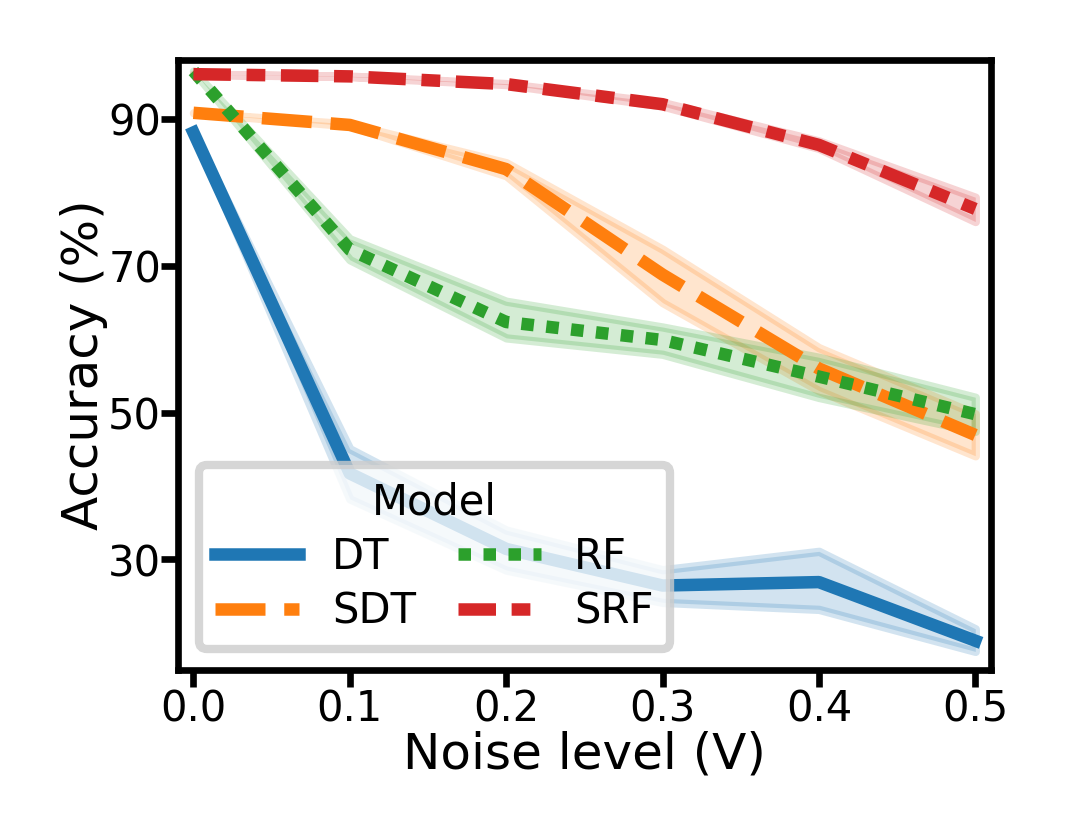

In [29]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=True
# plt.style.use('default')
fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax.set_box_aspect(1.32/1.76)
# sns.set_style('whitegrid')
sns.lineplot(data=acc_all[acc_all['Noise level']<0.6],x='Noise level',y='Accuracy',hue='Model',style='Model',hue_order=['DT','SDT','RF','SRF'])
# if noise_type==0:
    # plt.plot([0.1,0.1],[70,110],'k--')
    # plt.arrow(x=0.1,y=92,dx=-0.07,dy=0,length_includes_head=True,head_width = 0.3,head_length=0.01,fill=True,color='k')
    # plt.text(0.032,92.6,'Exp noise',fontsize=5)
    # plt.xlim(0,.3)
    # plt.ylim(80,102)

# if noise_type==1:
#     plt.plot([0.3,0.3],[70,110],'k--')
#     plt.arrow(x=0.3,y=92,dx=-0.155,dy=0,length_includes_head=True,head_width = 0.3,head_length=0.03,fill=True,color='k')
#     plt.text(0.15,92.6,'Exp noise')
    # plt.xlim(0,.3)
    # plt.ylim(80,102)
    
plt.xlabel('Noise level (V)',fontsize=6,labelpad=0)
plt.ylabel('Accuracy (%)',fontsize=6,labelpad=0)
ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
plt.legend(fontsize=5,title='Model',title_fontsize=5,ncol=2,loc='best',labelspacing=0.3,columnspacing=1)
# plt.savefig('./credit accuracy under uniform noise.svg',transparent=True,dpi=200)
plt.yticks([30,50,70,90])
plt.ylim([15,98])
plt.xlim([-0.01,0.51])
plt.savefig(fname="./MNIST compare.svg",format='svg')

In [9]:
# task_id_name = ['MNIST','electricity','bankmarketing', 'default-of-credit-card-clients','MiniBooNE']
task_id_name = ['electricity','bankmarketing', 'default-of-credit-card-clients','MiniBooNE']
data_all = pd.DataFrame()
for name in task_id_name:



    data_temp = pd.read_csv(name+'_gaussian_noise_SRF.csv',usecols=[1,2,3])
    # data_temp = pd.read_csv(name+'_uniform_noise_SRF.csv',usecols=[1,2,3])
    data_temp['Dataset']=name
    data_all = pd.concat((data_all,data_temp),axis=0,ignore_index=True)
    

In [10]:
for name in task_id_name:
    print(data_all[(data_all['Noise level']==0.0)&(data_all['Dataset']==name)][:4])

    Accuracy Model  Noise level      Dataset
0  76.590000    DT          0.0  electricity
1  78.550000    RF          0.0  electricity
2  79.076684   SDT          0.0  electricity
3  78.352515   SRF          0.0  electricity
      Accuracy Model  Noise level        Dataset
440  78.220000    DT          0.0  bankmarketing
441  80.620000    RF          0.0  bankmarketing
442  80.056444   SDT          0.0  bankmarketing
443  80.150517   SRF          0.0  bankmarketing
      Accuracy Model  Noise level                         Dataset
880  68.990000    DT          0.0  default-of-credit-card-clients
881  71.470000    RF          0.0  default-of-credit-card-clients
882  70.153731   SDT          0.0  default-of-credit-card-clients
883  71.316085   SRF          0.0  default-of-credit-card-clients
       Accuracy Model  Noise level    Dataset
1320  88.970000    DT          0.0  MiniBooNE
1321  90.230000    RF          0.0  MiniBooNE
1322  91.371908   SDT          0.0  MiniBooNE
1323  90.363252 

In [11]:
data_all['Noise level'].unique()

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

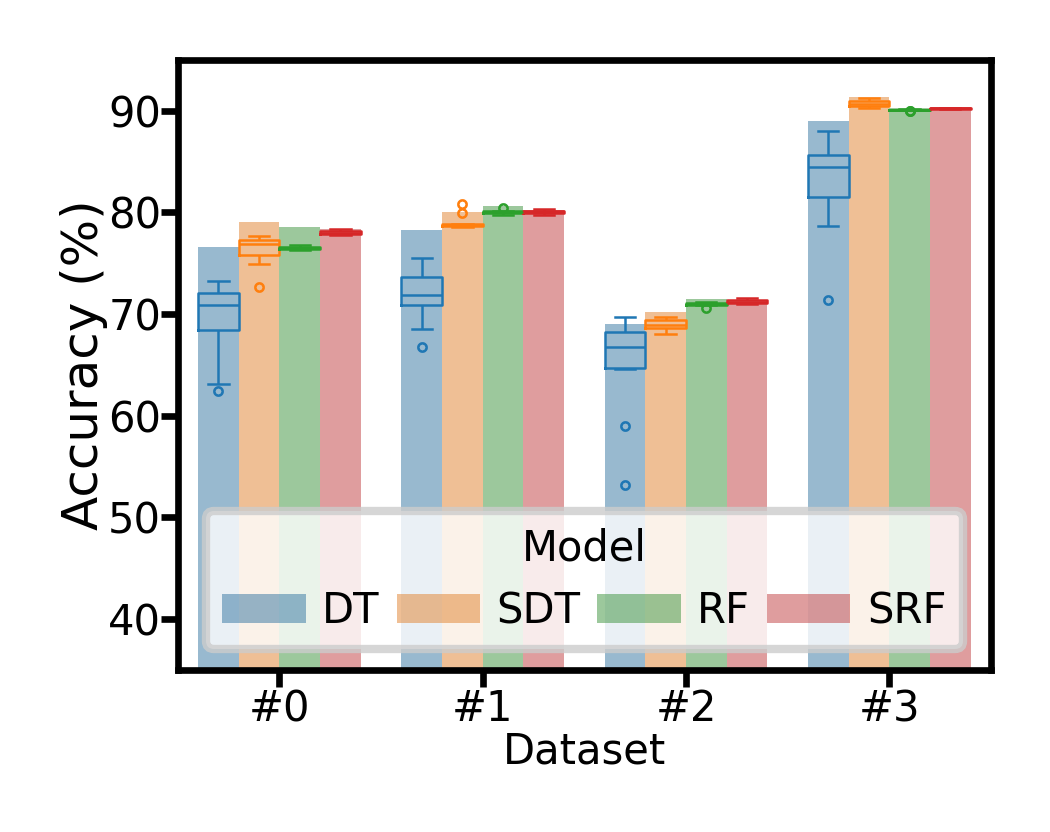

In [34]:
plt.style.use('default')
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=True
# 
fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax.set_box_aspect(1.32/1.76)
# sns.boxplot(data=data_all[data_all['Noise level']<=0.1],x='Dataset',y='Accuracy',hue='Model', hue_order=['DT','SDT','RF','SRF'],linewidth=0.3,fliersize=0.3,fill=False)
# sns.boxplot(data=data_all[data_all['Noise level']<=0.1],x='Dataset',y='Accuracy',hue='Noise level', linewidth=0.3,fliersize=0.3,fill=False)
# sns.boxplot(data=data_all[data_all['Noise level']==0.1],x='Dataset',y='Accuracy',hue='Model', hue_order=['DT','SDT','RF','SRF'],linewidth=0.3,fliersize=0.3,fill=False)
sns.boxplot(data=data_all[data_all['Noise level']==0.1],x='Dataset',y='Accuracy',hue='Model', hue_order=['DT','SDT','RF','SRF'],linewidth=0.3,fliersize=0.3,fill=False,legend=False)

sns.barplot(data=data_all[data_all['Noise level']==0.0],x='Dataset',y='Accuracy',hue='Model', hue_order=['DT','SDT','RF','SRF'],linewidth=0.3,fill=True,alpha=0.5)

plt.xticks([0,1,2,3],['#0','#1','#2','#3'])
# plt.xticks([0,1,2,3],['Electricity','Bankmarketing','Credit-card-clients','MiniBooNE'],rotation=15)


plt.xlabel('Dataset',fontsize=5,labelpad=0)
plt.ylabel('Accuracy (%)',fontsize=6,labelpad=0)
plt.ylim([35,95])
ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
plt.legend(fontsize=5,title='Model',title_fontsize=5,ncol=4,loc='lower center',columnspacing=0.4,markerscale=0.6,handletextpad=0.4)
plt.savefig(fname="./dataset compare.svg",format='svg')

In [ ]:
print(plt.rcParams["font.sans-serif"])
print(plt.rcParams["font.monospace"])

In [ ]:
sns.__version__

In [ ]:
plt.hist(X_test_resize)

In [ ]:
load_tree.node_threshold

In [ ]:
load_tree.node_threshold[0,0]

In [ ]:
load_tree.node_path

In [ ]:
threshold

In [ ]:
def decision_path_crisp(x1,x2):
    y=np.zeros([len(x1),len(x2)])
    for i,xx1 in enumerate(x1):
        if xx1<=-0.4167:
            y[i,:]=1
        else:
            for j,xx2 in enumerate(x2):
                if xx1<=0.375:
                    if xx2<=0.33898306:
                        y[i,j]=2
                    else:
                        y[i,j]=3
                else:
                    y[i,j]=3

    return y



In [ ]:
def modify_sigmoid(x,c,k):
    x = x.clone().detach()
    y = torch.sigmoid(k*(x-c))
    return y

def decision_path(x1,x2,row,n,c_array,k_array,decision_direction):
    y = 1
    for i in range(n):
        if i<=1:
            y = y*modify_sigmoid(x1,c_array[row,i],k_array[row,i]*decision_direction[i])
        else:
            # print(y.shape)
            y = y.reshape([1,-1])*modify_sigmoid(x2,c_array[row,i],k_array[row,i]*decision_direction[i]).reshape([-1,1])
    if n<=2:
        y = y.reshape([1,-1])*torch.ones([len(y),1])
    return y

In [ ]:
x1 = torch.tensor(np.arange(-1,1,0.01))
x2 = torch.tensor(np.arange(-1,1,0.01))
y0 = decision_path(x1,x2,0,1,load_tree.node_threshold,load_tree.node_gain,[1])
y1 = decision_path(x1,x2,1,3,load_tree.node_threshold,load_tree.node_gain,[-1,1,1])
y2 = decision_path(x1,x2,2,3,load_tree.node_threshold,load_tree.node_gain,[-1,1,-1])
y3 = decision_path(x1,x2,3,3,load_tree.node_threshold,load_tree.node_gain,[-1,-1,1])
y4 = decision_path(x1,x2,4,3,load_tree.node_threshold,load_tree.node_gain,[-1,-1,-1])

In [ ]:
u1 = decision_path_crisp(x1,x2)

In [ ]:
y_image = np.array([
    
    [y1.detach().numpy()],
    [(y2+y3+y4).detach().numpy()],
    [y0.detach().numpy()],
    ]
    )

In [ ]:
y_image.squeeze().transpose([1,2,0]).shape

In [ ]:
def custom_cmap():
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
    cmap = matplotlib.colors.ListedColormap(colors)
    return cmap

In [ ]:
plt.figure(dpi=200)
plt.imshow(u1.transpose(),origin = 'lower',cmap=custom_cmap(),alpha=0.8)
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim([0,200])
plt.ylim([0,200])
plt.scatter(X1*100+100,X2*100+100,c=y,s=10,cmap=plt.cm.brg)
# plt.title('Wrong:5')
# plt.legend(['class0','class1','class2'])

In [ ]:
plt.imshow(y_image.squeeze().transpose([1,2,0]),origin = 'lower',alpha=0.7)
# plt.imshow((y1).detach().numpy(),origin = 'lower',cmap='Oranges',alpha=0.5)
# plt.imshow((y2+y3+y4).detach().numpy(),origin = 'lower',cmap='Greens',alpha=0.3)
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
# plt.hold(True)
# plt.scatter(X1*100+100,X2*100+100,c=y)

In [ ]:
plt.imshow(y0.detach().numpy(),origin = 'lower',cmap='Blues',alpha=1)
# plt.imshow((y1).detach().numpy(),origin = 'lower',cmap='Oranges',alpha=1)
# plt.imshow((y2+y3+y4).detach().numpy(),origin = 'lower',cmap='Greens',alpha=1)
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.colorbar()
# plt.hold(True)
# plt.scatter(X1*100+100,X2*100+100,c=y)

In [ ]:
# plt.imshow((y0).detach().numpy())
# plt.imshow((y1).detach().numpy())
plt.imshow((y0+y1+y2+y3+y4).detach().numpy(),origin = 'lower')
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.colorbar()

In [ ]:
x1m,x2m = np.meshgrid(x1,x2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig1=plt.figure(dpi=200,facecolor='white')
ax=Axes3D(fig1,facecolor='white')

suf1 = ax.plot_surface(x1m, x2m, (y0).detach().numpy(),alpha=0.5,label='class0')
suf2 = ax.plot_surface(x1m, x2m, (y1).detach().numpy(),alpha=0.5,color='#ff7f0e',label='class1')
suf3 = ax.plot_surface(x1m, x2m, (y2).detach().numpy(),alpha=0.5,color='#2ca02c',label='class2')
suf4 = ax.plot_surface(x1m, x2m, (y3).detach().numpy(),alpha=0.5,color='#2ca02c')
suf5 = ax.plot_surface(x1m, x2m, (y4).detach().numpy(),alpha=0.5,color='#2ca02c')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
ax.set_zlabel('P')
# ax.set_zlim([0.3,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
suf1._facecolors2d=suf1._facecolors
suf1._edgecolors2d=suf1._edgecolors
suf2._facecolors2d=suf2._facecolors
suf2._edgecolors2d=suf2._edgecolors
suf3._facecolors2d=suf3._facecolors
suf3._edgecolors2d=suf3._edgecolors
suf4._facecolors2d=suf3._facecolors
suf4._edgecolors2d=suf3._edgecolors
suf5._facecolors2d=suf3._facecolors
suf5._edgecolors2d=suf3._edgecolors
# ax.legend((suf1,suf2,suf3),['class0','class1','class2'])
ax.legend(facecolor='white')
plt.show()
plt.savefig('decision surface.svg',transparent=True)


In [ ]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
# X1,X2 = X_test[:,-1],X_test[:,-2]

Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
clabel = [0.18,1]
colors=['#1f77b4', '#ff7f0e', '#2ca02c']
contour0 = plt.contourf(x1m,x2m,y0.detach().numpy(),clabel,colors=colors[0],alpha=.6)
contour1 = plt.contourf(x1m,x2m,y1.detach().numpy(),clabel,colors=colors[1],alpha=.6)
contour2 = plt.contourf(x1m,x2m,(y2).detach().numpy(),clabel,colors=colors[2],alpha=.6)
contour3 = plt.contourf(x1m,x2m,y3.detach().numpy(),clabel,colors=colors[2],alpha=.6)
contour4 = plt.contourf(x1m,x2m,y4.detach().numpy(),clabel,colors=colors[2],alpha=.6)
clabell = [0.4,0.5,0.6,0.7,0.8,0.9,1]
contour0 = plt.contour(x1m,x2m,y0.detach().numpy(),clabell,colors=colors[0],alpha=.8)
contour1 = plt.contour(x1m,x2m,y1.detach().numpy(),clabell,colors=colors[1],alpha=.8)
contour2 = plt.contour(x1m,x2m,(y2).detach().numpy(),clabell,colors=colors[2],alpha=.8)
contour3 = plt.contour(x1m,x2m,y3.detach().numpy(),clabell,colors=colors[2],alpha=.8)
contour4 = plt.contour(x1m,x2m,y4.detach().numpy(),clabell,colors=colors[2],alpha=.8)

plt.clabel(contour0,colors='k')
plt.clabel(contour1,colors='k')
plt.clabel(contour2,colors='k')
plt.clabel(contour3,colors='k')
plt.clabel(contour4,colors='k')
plt.scatter(X1,X2,c=y,s=5,cmap=plt.cm.brg)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Feature1')
plt.ylabel('Feature2')

In [ ]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y2.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

In [ ]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y3.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

In [ ]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y4.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

In [ ]:
Z.max()

In [ ]:
fig1=plt.figure(dpi=200,facecolor='white')
ax=Axes3D(fig1,facecolor='white')

# suf1 = ax.plot_surface(x1m, x2m, (y0).detach().numpy(),alpha=0.5,label='class0')
# suf2 = ax.plot_surface(x1m, x2m, (y1).detach().numpy(),alpha=0.5,color='#ff7f0e',label='class1')
# suf3 = ax.plot_surface(x1m, x2m, (y2+y3+y4).detach().numpy(),alpha=0.5,color='#2ca02c',label='class2')
suf3 = ax.plot_surface(x1m, x2m, u1,color='#2ca02c',cmap='Greens',label='class2')
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
# ax.set_zlim([0.3,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
suf1._facecolors2d=suf1._facecolors
suf1._edgecolors2d=suf1._edgecolors
suf2._facecolors2d=suf2._facecolors
suf2._edgecolors2d=suf2._edgecolors
suf3._facecolors2d=suf3._facecolors
suf3._edgecolors2d=suf3._edgecolors
# ax.legend((suf1,suf2,suf3),['class0','class1','class2'])
ax.legend(facecolor='white')
plt.show()
# plt.savefig('decision surface.svg',transparent=True)


In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
suf1._facecolors2d

In [ ]:
suf1._facecolors3d

In [ ]:
fig1=plt.figure(dpi=200)
ax=Axes3D(fig1)
ax.plot_surface(x1m, x2m, (y0).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

In [ ]:
fig1=plt.figure(dpi=200)
ax=Axes3D(fig1)
ax.plot_surface(x1m, x2m, (y1).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

In [ ]:
fig1=plt.figure(dpi=200)
ax=Axes3D(fig1)
ax.plot_surface(x1m, x2m, (y2).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

In [ ]:
y3.max()

In [ ]:
np.meshgrid(x1)

In [ ]:
X1,X2 = X[:,-1],X[:,-2]

In [ ]:
y

In [ ]:
plt.imshow(x1,x2,y1.detach().numpy())